In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("indian_liver_patient.csv")
# download the dataset using the above link and copy paste the link here

In [4]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])


No. of Males:  441
No. of Females:  142


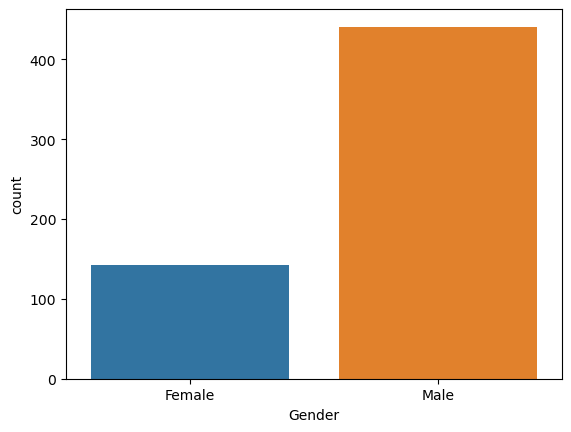

In [8]:
sns.countplot(x=data['Gender'], data=data)
m, f=data['Gender'].value_counts()
print("No. of Males: ", m)
print("No. of Females: ", f)

Liver disease patients:  416
Non-Liver disease patients:  167


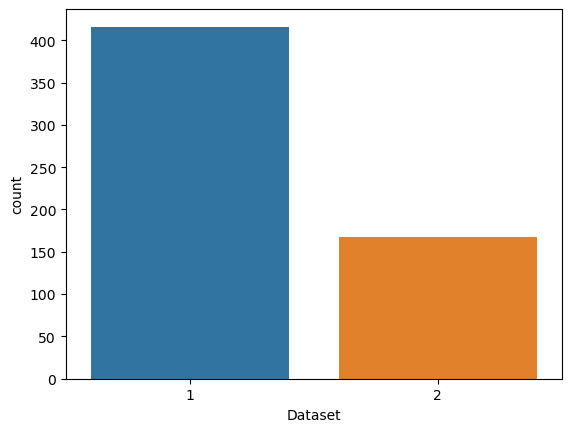

In [9]:
sns.countplot(x=data['Dataset'], data=data)
LD, NLD=data['Dataset'].value_counts()
print("Liver disease patients: ", LD)
print("Non-Liver disease patients: ", NLD)

In [10]:
le = LabelEncoder()


In [11]:
data['Gender'] = le.fit_transform(data['Gender'])

In [12]:
data


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [16]:
def partition(x):
    if x==2:
        return 0
    return 1

data['Dataset'] = data['Dataset'].map(partition)

In [17]:
data['Dataset'] 

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

In [18]:
# Data processing
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

In [19]:
#train test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [20]:
x_train.shape

(437, 10)

In [21]:
x_test.shape

(146, 10)

In [22]:
y_train.shape,y_test.shape

((437,), (146,))

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
sc = StandardScaler()

In [25]:
x_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [26]:
# LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred_lr = lr.predict(x_test)

C:\Users\Giri prasad\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

<Axes: >

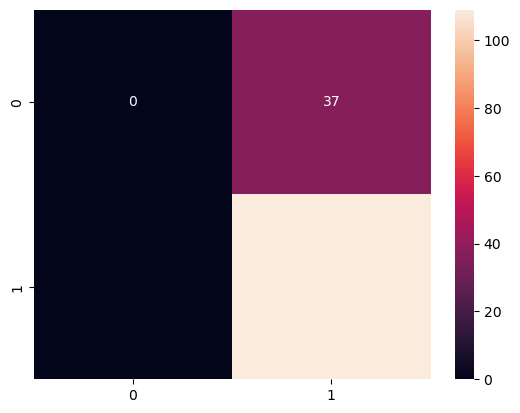

In [29]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test , y_pred_lr)
sns.heatmap(log_cm , annot = True)

In [30]:
lr_acc = accuracy_score(y_pred_lr, y_test)
lr_acc

0.7465753424657534

In [31]:
#KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
ypred_knn = knn.predict(x_test)

C:\Users\Giri prasad\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [33]:
knn_acc = accuracy_score(ypred_knn, y_test)
knn_acc


0.7465753424657534

In [34]:
#SVC()
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [35]:
y_pred_svm = svm.predict(x_test)

C:\Users\Giri prasad\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [36]:
svm_acc = accuracy_score(y_pred_svm, y_test)
svm_acc

0.7465753424657534

<Axes: >

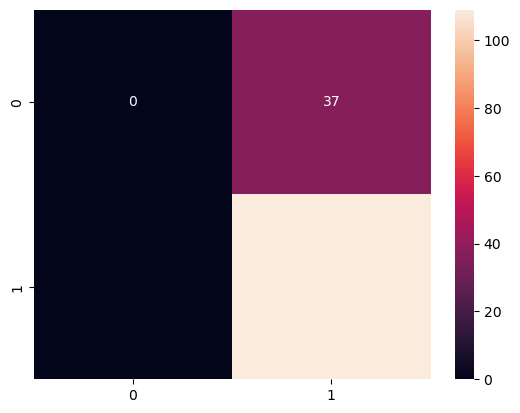

In [52]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test , y_pred_svm )
sns.heatmap(svm_cm , annot = True)

In [37]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [38]:
model=Sequential()

In [44]:
# Adding the input and first hidden layer
model.add(Dense(units=100,activation='relu',input_dim=10))
model.add(Dropout(rate=0.1))
# Ading second hidden layes
model.add(Dense(units=400,activation='relu'))
model.add(Dropout(rate=0.1))
# output Layer
model.add(Dense(units=1,activation='sigmoid',))

C:\Users\Giri prasad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6799 - loss: 0.6391
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7121 - loss: 0.4827 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.4139 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.3710 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3466 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8903 - loss: 0.3196 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.3478 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.2901 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3056 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8959 - loss: 0.3066 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.3036 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [47]:
ann_y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [48]:
ann_y_pred


array([[0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],
       [0.9999947],


In [50]:
ann_y_pred = ann_y_pred >= 0.5

<Axes: >

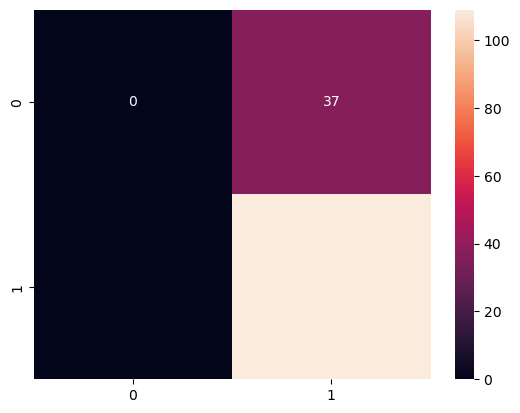

In [51]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_test , ann_y_pred)
sns.heatmap(ann_cm , annot = True)

In [54]:
import pickle 
pickle.dump(knn , open('model.pkl','wb'))
pickle.dump(sc , open('sc.pkl','wb'))